In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\chand\Downloads\iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 

# Data Preprocessing

In [3]:
data.shape

(150, 5)

In [4]:
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


_____
* Treating null values in the Data set

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

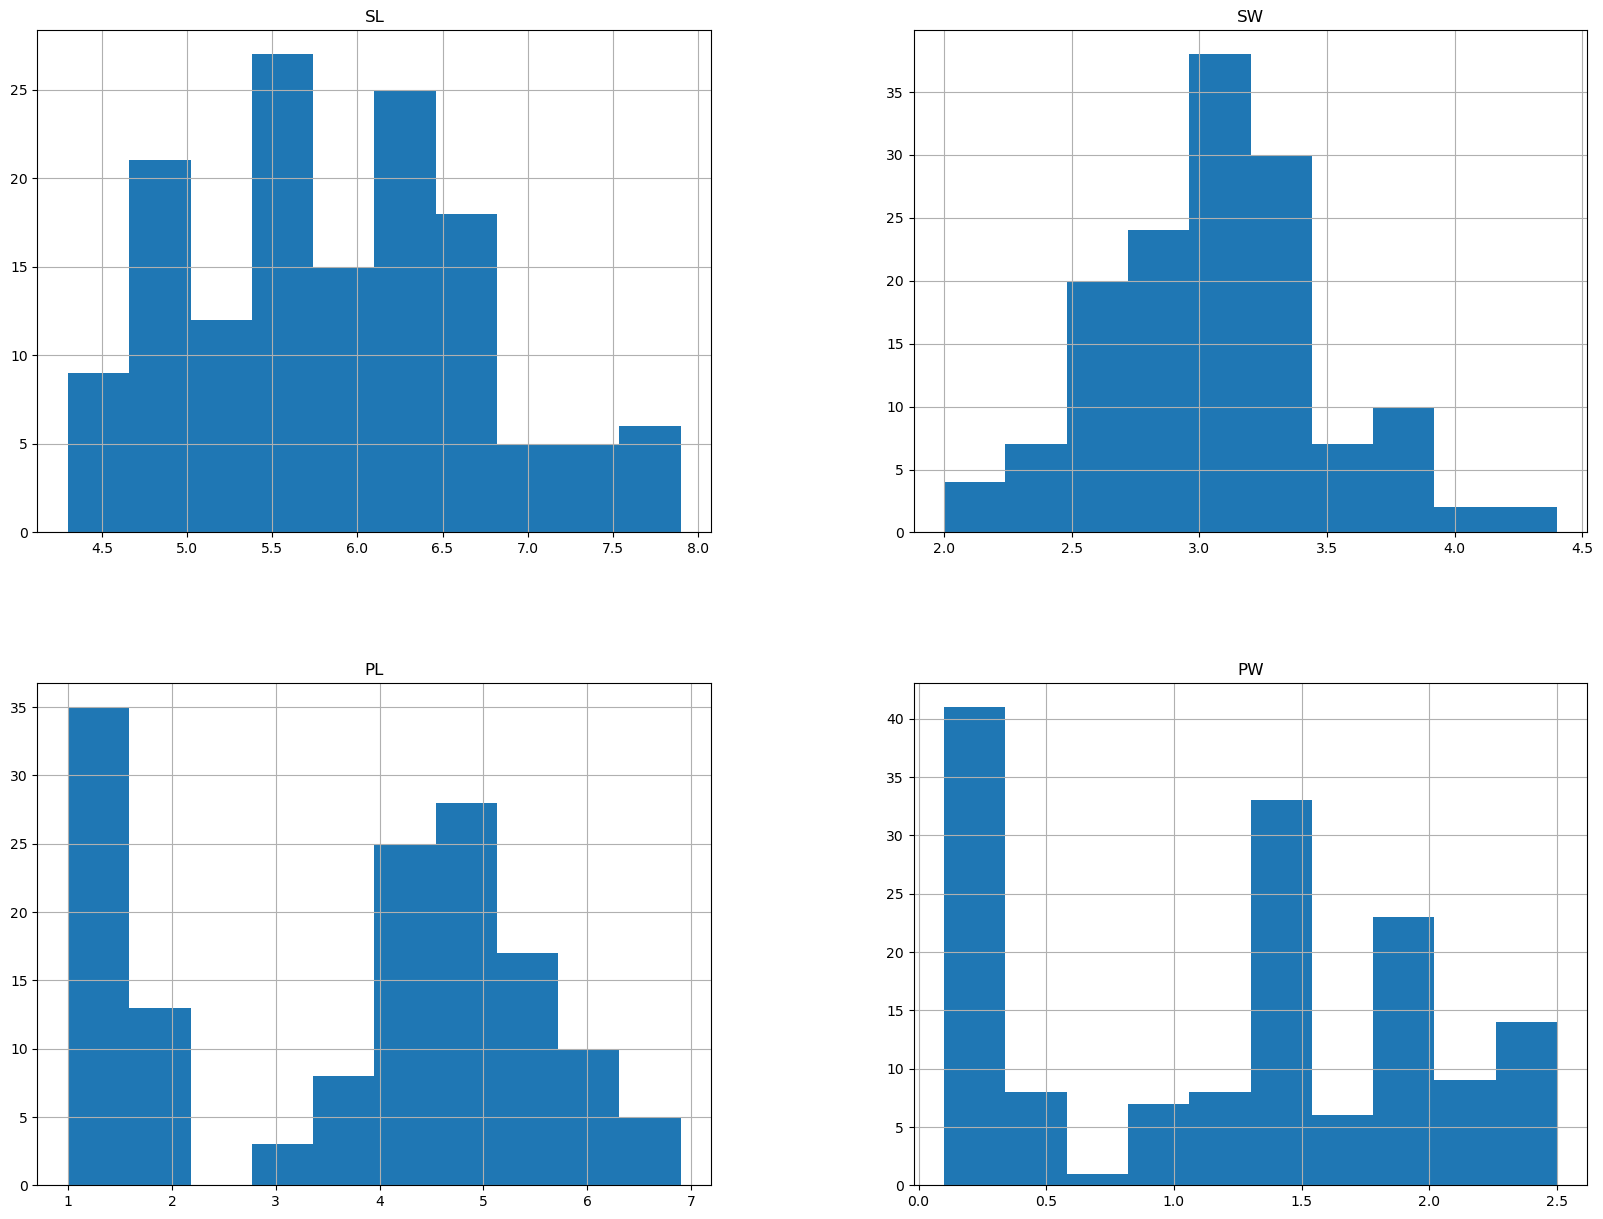

In [8]:
# Plotting Histogram for understanding the shape of the curve .

freqgraph= data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [9]:
# Filling the null values using mean and median values of the corresponding columns 

data['SL'] = data['SL'].fillna(data['SL'].median())
data['SW'] = data['SW'].fillna(data['SW'].mean())
data['PL'] = data['PL'].fillna(data['PL'].median())
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

________
* Checking Outliers


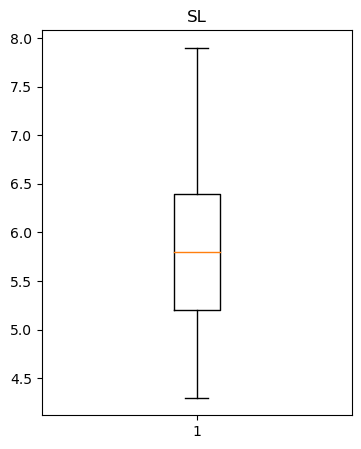

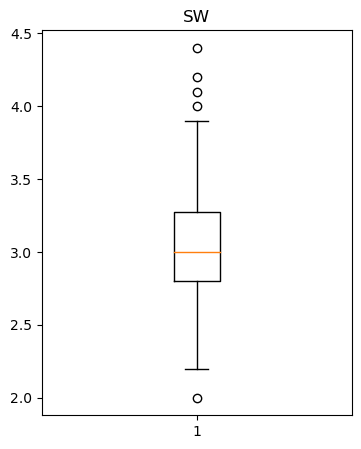

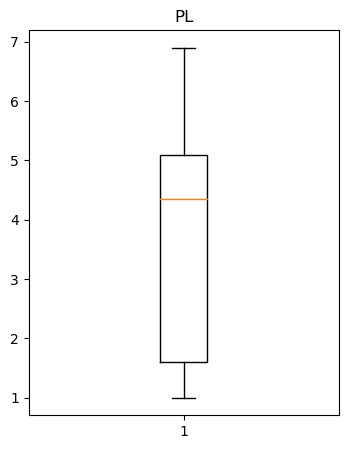

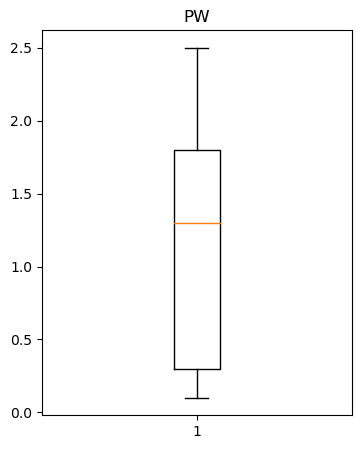

In [10]:
# Plotting Box plot of each columns

for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure(figsize=(4,5))
    plt.title(i)
    plt.boxplot(data[i])

__________
* Managing Outliers

In [11]:
# Treating outliers in "SW" column using IQR 

In [12]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
low_lim,up_lim

(2.1249999999999996, 3.9250000000000003)

In [13]:
# Assigning median values to the outliers which is greater than the upper limit

data.loc[data['SW']>up_lim,'SW']=np.median(data.SW)
data.loc[data['SW']>up_lim]

,SL,SW,PL,PW,Classification


In [14]:
# Assigning the median values to outliers which is less than the lower limit

data.loc[data['SW']<low_lim,'SW']=np.median(data.SW)
data.loc[data['SW']<low_lim]

,SL,SW,PL,PW,Classification


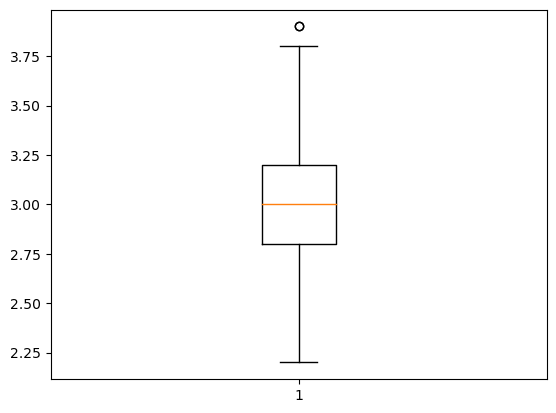

In [15]:
# Recheking the outliers of treated column

plt.boxplot(data['SW'])
plt.show()

In [17]:
data1=data.copy()

____
* Encoding the categorical variable

In [18]:
# Importing package to perform Label Encoding


from sklearn.preprocessing import LabelEncoder

In [25]:
# Encoding the classification column

le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [26]:
data.Classification.unique()

array([0, 1, 2], dtype=int64)

______
* Regression Analysis

In [27]:
# Assigning values for dependent and independent variables

x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [28]:
# Splitting data in to train data and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.2)

# 

# 1)  Logistic Regression

In [29]:
# Importing Logistic Regression package to perform the analysis

from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

# Fitting Logistic model using train and test data

log_model=log_model.fit(x_train,y_train)

# Prediction using Logistic model
y_prediction=log_model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [31]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [33]:
# Finding Confusion Matrix

confusion_matrix(y_test,y_prediction)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [37]:
print("Accuracy = ",accuracy_score(y_test,y_prediction))
print("Precision = ",precision_score(y_test,y_prediction,pos_label='positive',average='micro'))
print("Recall = ",recall_score(y_test,y_prediction,pos_label='positive',average='micro'))
print("F1 score = ",f1_score(y_test,y_prediction,pos_label='positive',average='micro'))



Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 score =  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## since every score value is one ,the model always predict correct label and it is a perfect model. 

# 

# 2) kNN Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# For finding a better k value

metric_k=[]
neighbors=np.arange(3,10)

In [62]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [45]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

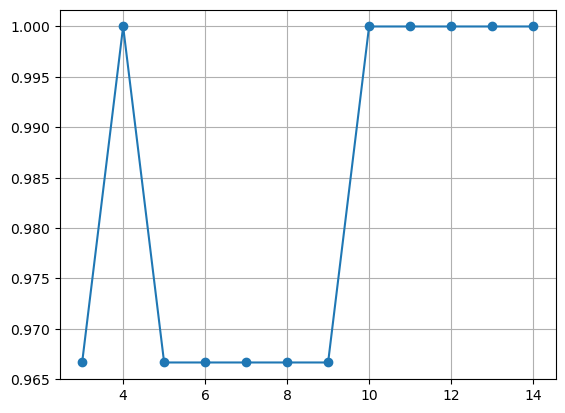

In [46]:
plt.plot(neighbors,metric_k,'o-');
plt.grid()

In [57]:
# Assigning the k value as 4 and Fitting kNN Model 

classifier=KNeighborsClassifier(n_neighbors=4,metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [65]:
# Finding Confusion Matrix

confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [59]:
# Finding Accuracy,Precision,Recall and F1 score of the model

print("Accuracy = ",accuracy_score(y_test,y_predictions))
print("Precision = ",precision_score(y_test,y_predictions,pos_label='positive',average='micro'))
print("Recall = ",recall_score(y_test,y_predictions,pos_label='positive',average='micro'))
print("F1 score = ",f1_score(y_test,y_predictions,pos_label='positive',average='micro'))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 score =  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## In this model also every score is 1, therfore the build model is perfect.

# 